# PLP Python: Week 7 Assignment
## Data Analysis and Visualization

## Import Required Libraries

First, we need to import the necessary libraries for data manipulation and visualization:

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

# Set the visual style for plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

## Task 1: Load and Explore the Dataset

In this section, we'll load the Iris dataset, convert it to a pandas DataFrame, and explore its structure.

In [2]:
# Load the Iris dataset from sklearn
try:
    # Load the iris dataset
    print("Loading the Iris dataset...")
    iris = load_iris()
    
    # Create a pandas DataFrame for easier manipulation
    column_names = iris.feature_names
    df = pd.DataFrame(iris.data, columns=column_names)
    
    # Add the target column (species)
    df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
    
    print("Dataset loaded successfully!")
except Exception as e:
    print(f"Error loading dataset: {e}")

Loading the Iris dataset...
Dataset loaded successfully!


### Explore the Dataset

Let's look at the first few rows of the dataset to understand its structure:

In [3]:
# Display the first 5 rows of the dataset
print("First 5 rows of the dataset:")
df.head()

First 5 rows of the dataset:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Dataset Structure and Information

Let's examine the dataset structure and check for missing values:

In [4]:
# Dataset structure and information
print("Dataset structure:")
df.info()

Dataset structure:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   sepal length (cm)  150 non-null    float64 
 1   sepal width (cm)   150 non-null    float64 
 2   petal length (cm)  150 non-null    float64 
 3   petal width (cm)   150 non-null    float64 
 4   species            150 non-null    category
dtypes: category(1), float64(4)
memory usage: 5.1 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   sepal length (cm)  150 non-null    float64 
 1   sepal width (cm)   150 non-null    float64 
 2   petal length (cm)  150 non-null    float64 
 3   petal width (cm)   150 non-null    float64 
 4   species            150 non-null    category
dtypes: category(1), float64(4)
me

In [5]:
# Check for missing values
print("Checking for missing values:")
missing_values = df.isnull().sum()
print(missing_values)

if missing_values.sum() > 0:
    print("Cleaning the dataset by filling missing values with column means...")
    # Fill numeric columns with mean
    df = df.fillna(df.mean())
    print("Missing values have been filled.")
else:
    print("No missing values found. The dataset is clean!")

Checking for missing values:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64
No missing values found. The dataset is clean!


## Task 2: Basic Data Analysis

In this section, we'll compute basic statistics of the dataset and analyze patterns across different species.

In [6]:
# Compute basic statistics
print("Basic statistics of the dataset:")
df.describe()

Basic statistics of the dataset:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
# Group by species and compute mean
print("Mean values grouped by species:")
species_means = df.groupby('species').mean()
species_means

Mean values grouped by species:


C:\Users\hp\AppData\Local\Temp\ipykernel_6872\1714786129.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  species_means = df.groupby('species').mean()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


### Key Findings

Based on the analysis, we can observe the following patterns:

1. **Iris-setosa** has the shortest petal length and width compared to other species.
2. **Iris-virginica** has the largest measurements in almost all dimensions.
3. Sepal width shows less variation between species compared to other features.
4. There's a clear separation between species when looking at petal measurements.

## Task 3: Data Visualization

Now let's create various visualizations to better understand the dataset:

### 1. Line Chart: Average Measurements by Species

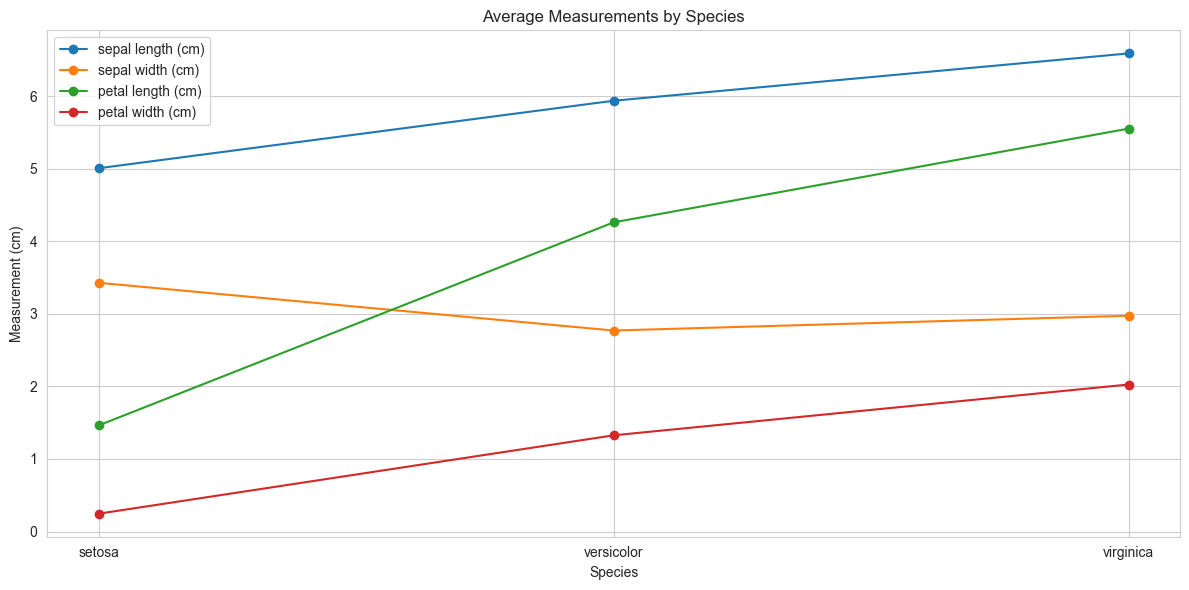

In [8]:
# Line chart: Showing average measurements by species
plt.figure(figsize=(12, 6))
for feature in column_names:
    plt.plot(species_means.index, species_means[feature], marker='o', label=feature)

plt.title('Average Measurements by Species')
plt.xlabel('Species')
plt.ylabel('Measurement (cm)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

The line chart above shows how the average measurements of sepal length, sepal width, petal length, and petal width vary across the three iris species. We can see that petal measurements show the greatest variation between species.

### 2. Bar Chart: Comparing Petal Length Across Species

C:\Users\hp\AppData\Local\Temp\ipykernel_6872\1604021726.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='species', y='petal length (cm)', data=df, palette='viridis')


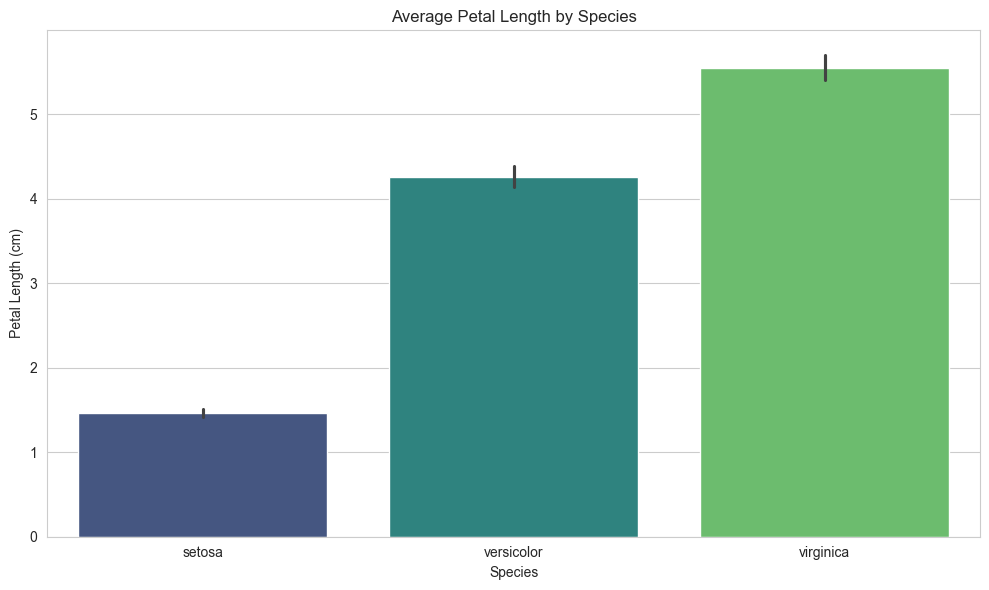

In [9]:
# Bar chart: Comparing petal length across species
plt.figure(figsize=(10, 6))
sns.barplot(x='species', y='petal length (cm)', data=df, palette='viridis')
plt.title('Average Petal Length by Species')
plt.xlabel('Species')
plt.ylabel('Petal Length (cm)')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

The bar chart clearly demonstrates the significant difference in petal length between the three iris species. Iris-setosa has the shortest petals, Iris-versicolor has medium-sized petals, and Iris-virginica has the longest petals.

### 3. Histogram: Distribution of Sepal Length

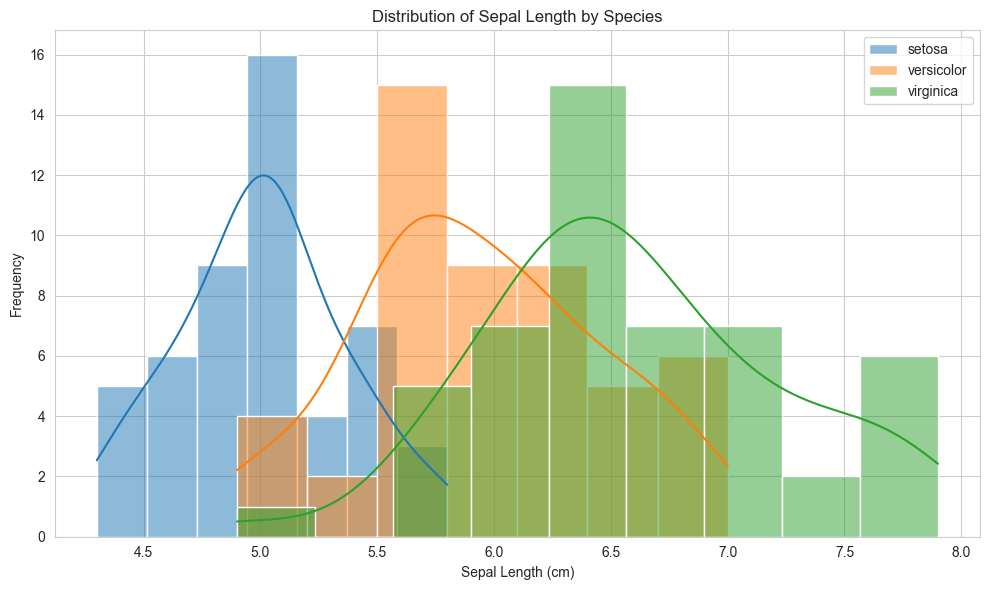

In [10]:
# Histogram: Distribution of sepal length
plt.figure(figsize=(10, 6))
for species in iris.target_names:
    subset = df[df['species'] == species]
    sns.histplot(subset['sepal length (cm)'], kde=True, label=species)

plt.title('Distribution of Sepal Length by Species')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

This histogram shows the distribution of sepal length for each of the three iris species. There is some overlap between species, particularly between Iris-versicolor and Iris-virginica, but Iris-setosa has a distinct distribution with generally shorter sepals.

### 4. Scatter Plot: Relationship Between Sepal Length and Petal Length

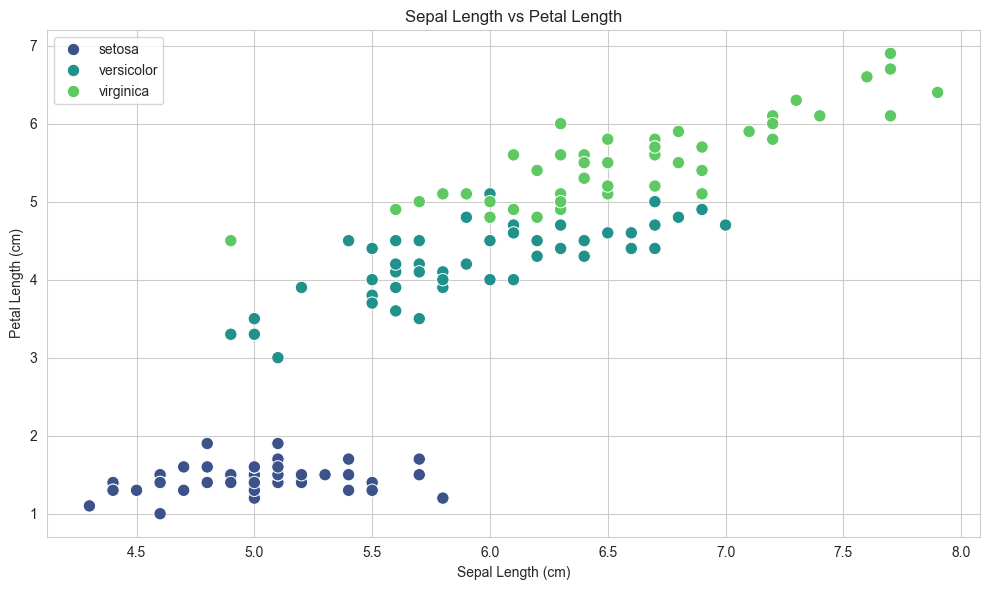

In [11]:
# Scatter plot: Relationship between sepal length and petal length
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sepal length (cm)', y='petal length (cm)', 
                hue='species', data=df, palette='viridis', s=80)
plt.title('Sepal Length vs Petal Length')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

The scatter plot reveals a strong correlation between sepal length and petal length, especially within each species. Iris-setosa forms a distinct cluster separate from the other two species, indicating it could be easily classified based on these two features alone.

### 5. Additional Visualization: Pair Plot

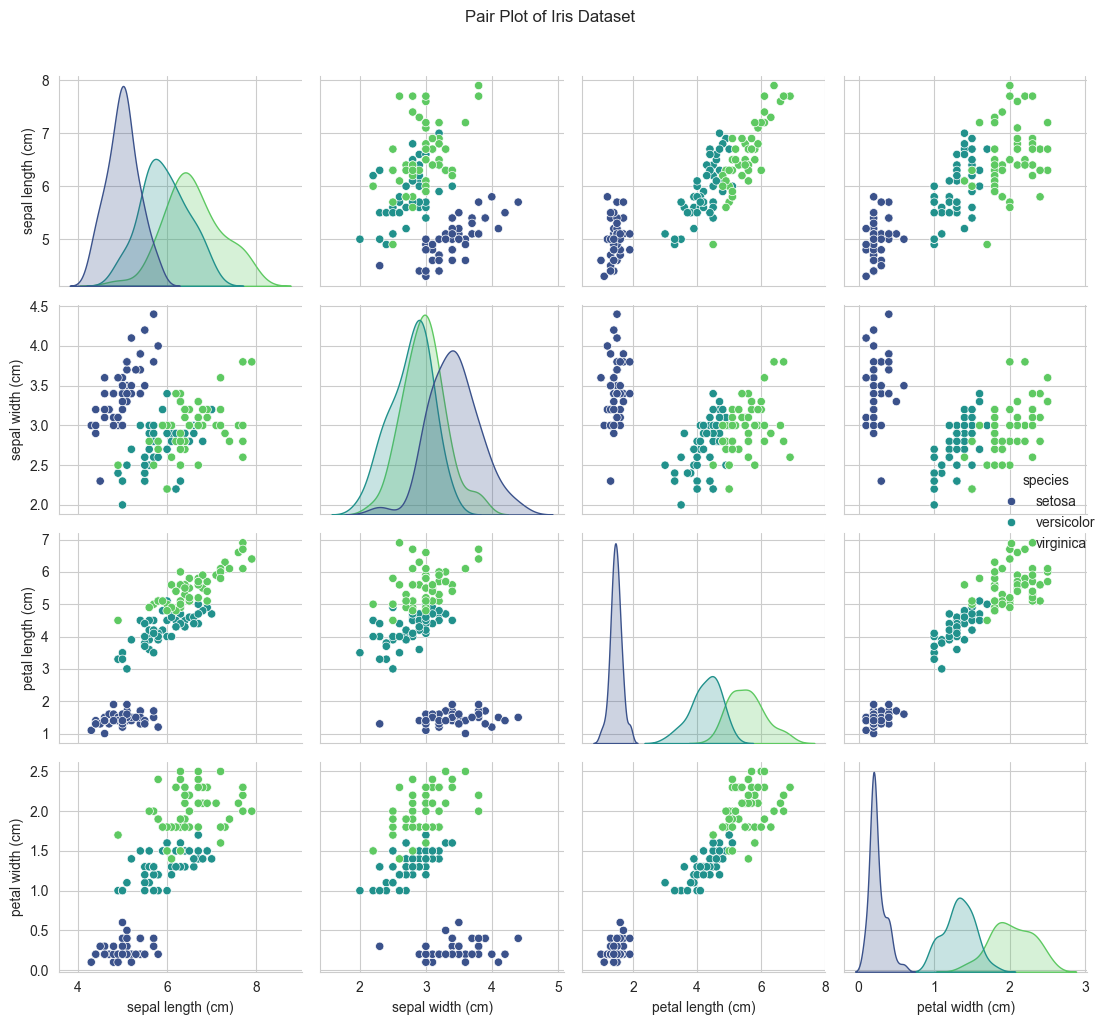

In [12]:
# Pair plot for all features
pair_plot = sns.pairplot(df, hue='species', height=2.5, palette='viridis')
pair_plot.fig.suptitle('Pair Plot of Iris Dataset', y=1.02)
plt.tight_layout()
plt.show()

The pair plot above provides a comprehensive view of the relationships between all features in the Iris dataset. It shows scatter plots for each pair of features, color-coded by species, as well as the distribution of each feature along the diagonal.

## Conclusion

Based on our analysis and visualizations, we can draw the following conclusions:

1. The Iris dataset contains three species (setosa, versicolor, and virginica) with 50 samples each, measured across four features.
2. Iris-setosa is the most distinct species and can be easily separated from the others based on petal measurements alone.
3. There is some overlap between Iris-versicolor and Iris-virginica, particularly in sepal measurements.
4. Petal length and width show stronger correlations with species than sepal measurements.
5. There's a positive correlation between sepal length and petal length across all species.

These insights could be useful for developing classification models to identify iris species based on their measurements.